# Clustermap of immunoglobulin gene use

Here we will make the following figures:

  * V gene usage clustermap (**Figure 1a**)
  * D gene usage clustermap (**Figure 1b**)
  * J gene usage clustermap (**Figure 1c**)
  
  
The raw data used to make these plots can be found [**here**](https://www.ncbi.nlm.nih.gov/sra/PRJNA592154).

The following Python packages are required to run the code in this notebook:
  * numpy
  * pandas
  * matplotlib
  * seaborn
  * [abutils](https://www.github.com/briney/abutils)

They can be install by running `pip install numpy pandas matplotlib seaborn abutils`

In [1]:
import itertools
import os
import sys

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from abutils.utils import mongodb
from abutils.utils import color

%matplotlib inline

In [2]:
def scale_and_normalize(df):
    '''
    This will scale the read counts for the samples 
    in the same way that DeSeq2 scales RNAseq reads
    and then will perform global normalization.
       - df input is a dataframe with read counts, 
         genes as rows, samples as columns.
    '''
    #First take the log of each read count
    df_log = np.log(df)
    
    #Then calculate the geometric mean across rows
    df_log['geometric mean'] = df_log.mean(axis=1)
    
    #Remove any genes that are not expressed by OmniRats
    df_log = df_log[df_log['geometric mean'] != np.NINF]
    
    #Get rid of the geometric mean column
    df_log = df_log.drop('geometric mean', 1)
    
    #Subtract each value from the mean of its columnn
    df_log = df_log.sub(df_log.mean(axis=1), axis=0)
    
    #Calculate scaling factors
    scaling_factors = []
    for median in list(df_log.median()):
        scaling_factors.append(math.exp(median))
    
    #Divide each column by the scaling factor
    for i, col in enumerate(df.columns):
        sf = scaling_factors[i]
        df[col] = df[col]/sf
        
    #remove where there is no expression
    df = df[df.index.isin(df_log.index)]
    
    return df

## V gene clustermap

To determine the differences in variable (V) gene use between the two species we asses the frequency of each gene in each normalized and scaled repertoire by calculating the Z-score across repertoires and plotting a clustermap.

In [3]:
#load in the data
omnirat_vgene_df = pd.read_csv('../Data/omnirat_vgene_counts.csv', index_col=0)
human_vgene_df = pd.read_csv('../Data/human_vgene_counts.csv', index_col=0)

#combine the dataframes
combined_vgene_df = human_vgene_df.join(omnirat_vgene_df).fillna(0)

#scale and normalize
norm_vgene_df = scale_and_normalize(combined_vgene_df)

/gpfs/ims/home/cjoyce/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [12]:
norm_vgene_df.to_csv('../Data/combined_scaled_vgene_counts.csv')

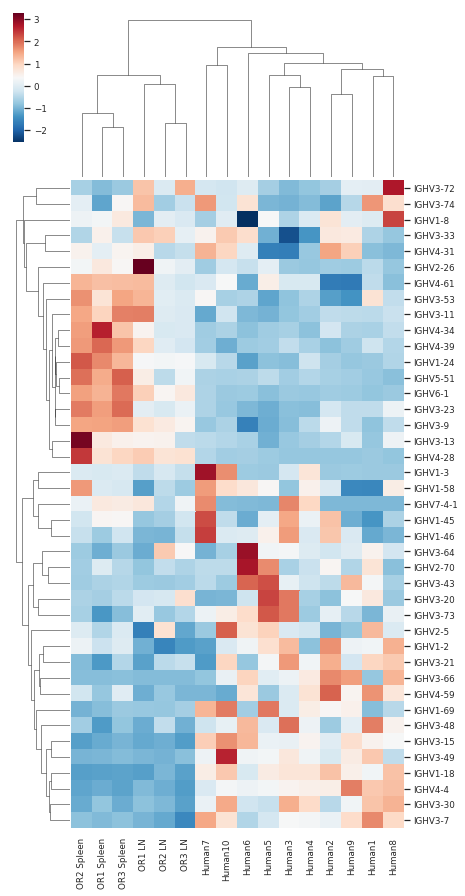

In [13]:
#plot the figure

#set the font scale
sns.set(font_scale=.8)

#plot the figure
sns.clustermap(norm_vgene_df,cmap="RdBu_r", z_score=0, figsize=(7, 15), metric='euclidean')

plt.tight_layout()
plt.savefig('./figures/figure1a', dpi=800, bbox_inches = "tight")
plt.show()

## D gene clustermap

To determine the differences in diversity (D) gene use between the two species we asses the frequency of each gene in each normalized and scaled repertoire by calculating the Z-score across repertoires and plotting a clustermap.

In [14]:
#load in the data
omnirat_dgene_df = pd.read_csv('../Data/omnirat_dgene_counts.csv', index_col=0)
human_dgene_df = pd.read_csv('../Data/human_dgene_counts.csv', index_col=0)

#combine the dataframes
combined_dgene_df = human_dgene_df.join(omnirat_dgene_df).fillna(0)

#scale and normalize
norm_dgene_df = scale_and_normalize(combined_dgene_df)

#Save the norm_dgene_df for Figure 2
norm_dgene_df.to_csv('../Data/norm_dgene_df.csv')

In [15]:
norm_dgene_df.to_csv('../Data/combined_scaled_dgene_counts.csv')

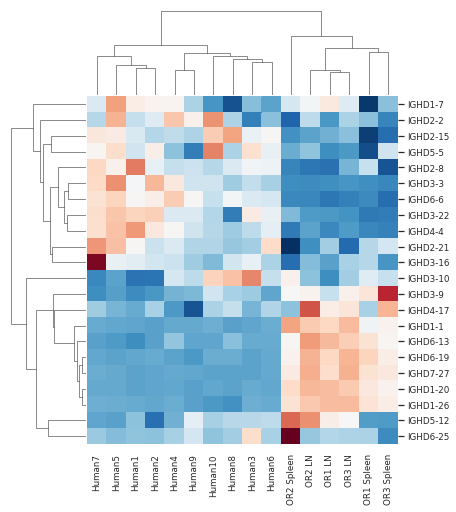

In [16]:
#plot the figure

#set the font scale
sns.set(font_scale=.8)

#plot the figure
g = sns.clustermap(norm_dgene_df,cmap="RdBu_r", z_score=0, figsize=(7, 8.048), metric='euclidean')
g.cax.set_visible(False)

plt.tight_layout()
plt.savefig('./figures/figure1b', dpi=800, bbox_inches = "tight")
plt.show()

## J gene clustermap

To determine the differences in joining (J) gene use between the two species we asses the frequency of each gene in each normalized and scaled repertoire by calculating the Z-score across repertoires and plotting a clustermap.

In [17]:
#load in the data
omnirat_jgene_df = pd.read_csv('../Data/omnirat_jgene_counts.csv', index_col=0)
human_jgene_df = pd.read_csv('../Data/human_jgene_counts.csv', index_col=0)

#combine the dataframes
combined_jgene_df = human_jgene_df.join(omnirat_jgene_df).fillna(0)

#scale and normalize
norm_jgene_df = scale_and_normalize(combined_jgene_df)

In [18]:
norm_jgene_df.to_csv('../Data/combined_scaled_jgene_counts.csv')

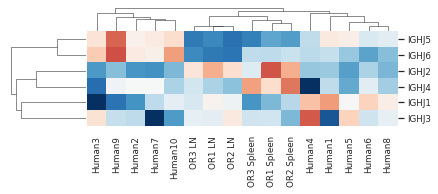

In [19]:
#plot the figure

#set the font scale
sns.set(font_scale=.8)

#plot the figure
g = sns.clustermap(norm_jgene_df,cmap="RdBu_r", z_score=0, figsize=(7,2.195), metric='euclidean', vmin=-2, vmax=3)
g.cax.set_visible(False)

#rotate axis labels
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('./figures/figure1c', dpi=800, bbox_inches = "tight")
plt.show()